In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from numpy.core.defchararray import add
import seaborn as sns

# Loading test set

In [2]:
lensed_data_haris= dict(np.load('../data/injection_pars/haris-et-al/lensed_inj_data.npz'))
unlensed_data_haris= dict(np.load('../data/injection_pars/haris-et-al/unlensed_inj_data.npz'))


In [3]:
df_test=pd.read_csv('../data/dataframes/test/ML_combined_kaggle.csv',index_col=0)
df_test.columns

Index(['img_0', 'img_1', 'Lensing', 'bayestar_skymaps_blu',
       'bayestar_skymaps_d2', 'bayestar_skymaps_d3', 'bayestar_skymaps_lsq',
       'm1, m2, ra, sin_dec, a1, a2, costilt1, costilt2, costheta_jn',
       'm1, m2, ra, sin_dec, costheta_jn', 'ra, sin_dec',
       '# m1, m2, ra, sin_dec, a1, a2, costilt1, costilt2',
       'm1, m2, ra, sin_dec', 'm1, m2', 'xgb_pred_bayestar_skymaps',
       'xgb_pred_bayestar_skymaps_1', 'xgb_pred_bayestar_skymaps_2',
       'xgb_pred_bayestar_skymaps_3', 'xgb_pred_bayestar_skymaps_4',
       'xgb_pred_bayestar_skymaps_5', 'xgb_pred_bayestar_skymaps_6',
       'xgb_pred_bayestar_skymaps_7', 'xgb_pred_bayestar_skymaps_8',
       'xgb_pred_bayestar_skymaps_9', 'xgb_pred_bayestar_skymaps_10',
       'xgb_pred_bayestar_skymaps_fpp', 'ra, sin_dec_fpp', 'dense_H1_0',
       'mean_overlap_qts_H1', 'std_overlap_qts_H1', 'lsq_overlap_qts_H1',
       'dense_L1_0', 'mean_overlap_qts_L1', 'std_overlap_qts_L1',
       'lsq_overlap_qts_L1', 'dense_V1_0', 'me

## Skyfeatures statistics

/home1/srashti.goyal/anaconda3/envs/bilby_env/lib/python3.7/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


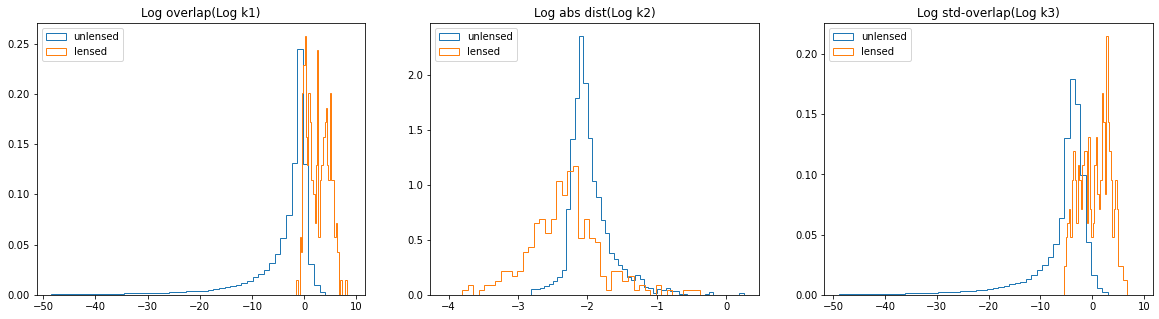

In [11]:
plt.figure(figsize=(20,5))
plt.subplot(131)
stat='bayestar_skymaps_blu'
df=df_test[df_test['Lensing'] == 0]
bins=np.linspace(np.percentile(np.log(df[stat]),1),np.percentile(np.log(df[stat]),99.9),50)
plt.hist(np.log(df[stat]),bins=bins,histtype='step',label='unlensed',density=True)
df=df_test[df_test['Lensing'] == 1]
bins=np.linspace(np.percentile(np.log(df[stat]),0.01),np.percentile(np.log(df[stat]),99.9),50)
plt.hist(np.log(df[stat]),bins=bins,histtype='step',label='lensed',density=True)
plt.legend()
plt.title('Log overlap(Log k1)')
plt.subplot(132)
stat='bayestar_skymaps_lsq'
df=df_test[df_test['Lensing'] == 0]
bins=np.linspace(np.percentile(np.log(df[stat]),1),np.percentile(np.log(df[stat]),99.9),50)
plt.hist(np.log(df[stat]),bins=bins,histtype='step',label='unlensed',density=True)
df=df_test[df_test['Lensing'] == 1]
bins=np.linspace(np.percentile(np.log(df[stat]),0.01),np.percentile(np.log(df[stat]),99.9),50)
plt.hist(np.log(df[stat]),bins=bins,histtype='step',label='lensed',density=True)
plt.legend()
plt.title('Log abs dist(Log k2)')
plt.subplot(133)
stat='bayestar_skymaps_d3'
df=df_test[df_test['Lensing'] == 0]
bins=np.linspace(np.percentile(np.log(df[stat]),1),np.percentile(np.log(df[stat]),99.9),50)
plt.hist(np.log(df[stat]),bins=bins,histtype='step',label='unlensed',density=True)
df=df_test[df_test['Lensing'] == 1]
bins=np.linspace(np.percentile(np.log(df[stat]),0.01),np.percentile(np.log(df[stat]),99.9),50)
plt.hist(np.log(df[stat]),bins=bins,histtype='step',label='lensed',density=True)
plt.legend()
plt.title('Log std-overlap(Log k3)')
plt.show()

/home1/srashti.goyal/anaconda3/envs/bilby_env/lib/python3.7/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home1/srashti.goyal/anaconda3/envs/bilby_env/lib/python3.7/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home1/srashti.goyal/anaconda3/envs/bilby_env/lib/python3.7/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home1/srashti.goyal/anaconda3/envs/bilby_env/lib/python3.7/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


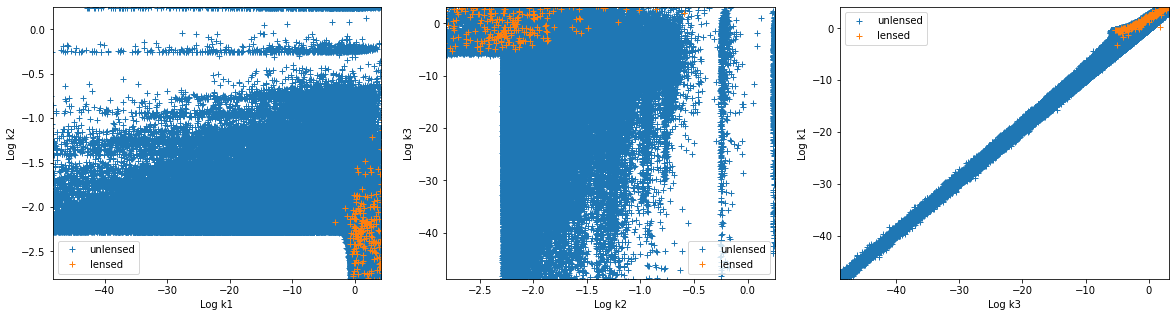

In [5]:
plt.figure(figsize=(20,5))
plt.subplot(131)
stat1='bayestar_skymaps_blu'
stat2='bayestar_skymaps_lsq'
df=df_test[df_test['Lensing'] == 0]
plt.plot(np.log(df[stat1]),np.log(df[stat2]),'+',color='C0',label='unlensed')
df=df_test[df_test['Lensing'] == 1]
plt.plot(np.log(df[stat1]),np.log(df[stat2]),'+',color='C1',label='lensed')
plt.xlim(np.percentile(np.log(df_test[stat1]),1),np.percentile(np.log(df_test[stat1]),99.9))
plt.ylim(np.percentile(np.log(df_test[stat2]),1),np.percentile(np.log(df_test[stat2]),99.9))
plt.xlabel('Log k1')
plt.ylabel('Log k2')
plt.legend()
plt.subplot(132)
stat1='bayestar_skymaps_lsq'
stat2='bayestar_skymaps_d3'
df=df_test[df_test['Lensing'] == 0]
plt.plot(np.log(df[stat1]),np.log(df[stat2]),'+',color='C0',label='unlensed')
df=df_test[df_test['Lensing'] == 1]
plt.plot(np.log(df[stat1]),np.log(df[stat2]),'+',color='C1',label='lensed')
plt.xlim(np.percentile(np.log(df_test[stat1]),1),np.percentile(np.log(df_test[stat1]),99.9))
plt.ylim(np.percentile(np.log(df_test[stat2]),1),np.percentile(np.log(df_test[stat2]),99.9))
plt.xlabel('Log k2')
plt.ylabel('Log k3')
plt.legend()
plt.subplot(133)
stat1='bayestar_skymaps_d3'
stat2='bayestar_skymaps_blu'
df=df_test[df_test['Lensing'] == 0]
plt.plot(np.log(df[stat1]),np.log(df[stat2]),'+',color='C0',label='unlensed')
df=df_test[df_test['Lensing'] == 1]
plt.plot(np.log(df[stat1]),np.log(df[stat2]),'+',color='C1',label='lensed')
plt.xlim(np.percentile(np.log(df_test[stat1]),1),np.percentile(np.log(df_test[stat1]),99.9))
plt.ylim(np.percentile(np.log(df_test[stat2]),1),np.percentile(np.log(df_test[stat2]),99.9))
plt.xlabel('Log k3')
plt.ylabel('Log k1')
plt.legend()
plt.show()

## BLU and ML FPPs comparison for test set

/home1/srashti.goyal/anaconda3/envs/bilby_env/lib/python3.7/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


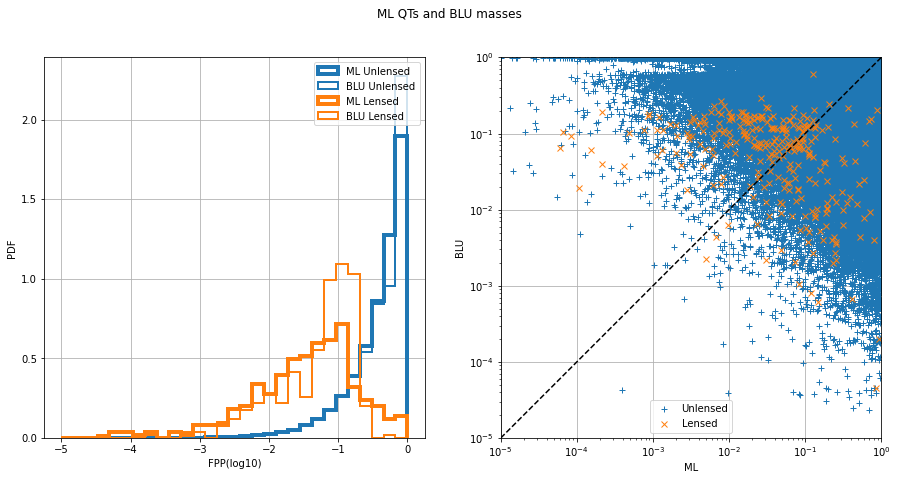

In [6]:
blu_stat='m1, m2'
ml_stat='xgb_dense_QTS_0'
plt.figure(figsize=(15,7))
plt.subplot(121)
bins=np.linspace(-5,0,30)
#plt.ylim(-100,1e3)
df=df_test[df_test['Lensing'] == 0]
plt.hist(np.log10(df[ml_stat+'_fpp']),bins=bins,label='ML Unlensed', histtype='step',density=True,color='C0',lw=4)
plt.hist(np.log10(df[blu_stat+'_fpp']),bins=bins,label='BLU Unlensed', histtype='step',density=True,color='C0',lw=2)

df=df_test[df_test['Lensing'] == 1]
plt.hist(np.log10(df[ml_stat+'_fpp']),bins=bins,label='ML Lensed', histtype='step',density=True,color='C1',lw=4)
plt.hist(np.log10(df[blu_stat+'_fpp']),bins=bins,label='BLU Lensed', histtype='step',density=True,color='C1',lw=2)

plt.legend()
plt.xlabel('FPP(log10)')
plt.ylabel('PDF')
plt.grid()

plt.subplot(122)
df=df_test[df_test['Lensing'] == 0]
plt.loglog(df[ml_stat+'_fpp'],df[blu_stat+'_fpp'],'+',label='Unlensed',color='C0')
df=df_test[df_test['Lensing'] == 1]
plt.loglog(df[ml_stat+'_fpp'],df[blu_stat+'_fpp'],'x',label='Lensed',color='C1')
plt.loglog(10**bins,10**bins,'k--')
plt.legend()
plt.xlabel('ML')
plt.ylabel('BLU')
plt.grid()
plt.xlim(1e-5,1)
plt.ylim(1e-5,1)
plt.suptitle('ML QTs and BLU masses')
plt.show()

/home1/srashti.goyal/anaconda3/envs/bilby_env/lib/python3.7/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home1/srashti.goyal/anaconda3/envs/bilby_env/lib/python3.7/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


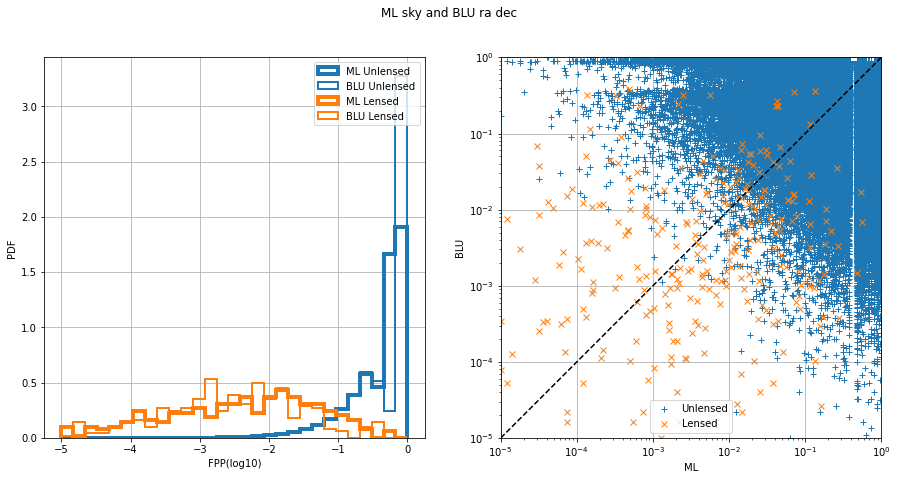

In [7]:
ml_stat='xgb_pred_bayestar_skymaps'
blu_stat= 'ra, sin_dec'
plt.figure(figsize=(15,7))
plt.subplot(121)
bins=np.linspace(-5,0,30)
#plt.ylim(-100,1e3)
df=df_test[df_test['Lensing'] == 0]
plt.hist(np.log10(df[ml_stat+'_fpp']),bins=bins,label='ML Unlensed', histtype='step',density=True,color='C0',lw=4)
plt.hist(np.log10(df[blu_stat+'_fpp']),bins=bins,label='BLU Unlensed', histtype='step',density=True,color='C0',lw=2)

df=df_test[df_test['Lensing'] == 1]
plt.hist(np.log10(df[ml_stat+'_fpp']),bins=bins,label='ML Lensed', histtype='step',density=True,color='C1',lw=4)
plt.hist(np.log10(df[blu_stat+'_fpp']),bins=bins,label='BLU Lensed', histtype='step',density=True,color='C1',lw=2)

plt.legend()
plt.xlabel('FPP(log10)')
plt.ylabel('PDF')
plt.grid()

plt.subplot(122)
df=df_test[df_test['Lensing'] == 0]
plt.loglog(df[ml_stat+'_fpp'],df[blu_stat+'_fpp'],'+',label='Unlensed',color='C0')
df=df_test[df_test['Lensing'] == 1]
plt.loglog(df[ml_stat+'_fpp'],df[blu_stat+'_fpp'],'x',label='Lensed',color='C1')
plt.legend()
plt.loglog(10**bins,10**bins,'k--')
plt.xlabel('ML')
plt.ylabel('BLU')
plt.xlim(1e-5,1)
plt.ylim(1e-5,1)

plt.grid()
plt.suptitle('ML sky and BLU ra dec')

plt.show()

/home1/srashti.goyal/anaconda3/envs/bilby_env/lib/python3.7/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home1/srashti.goyal/anaconda3/envs/bilby_env/lib/python3.7/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home1/srashti.goyal/anaconda3/envs/bilby_env/lib/python3.7/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


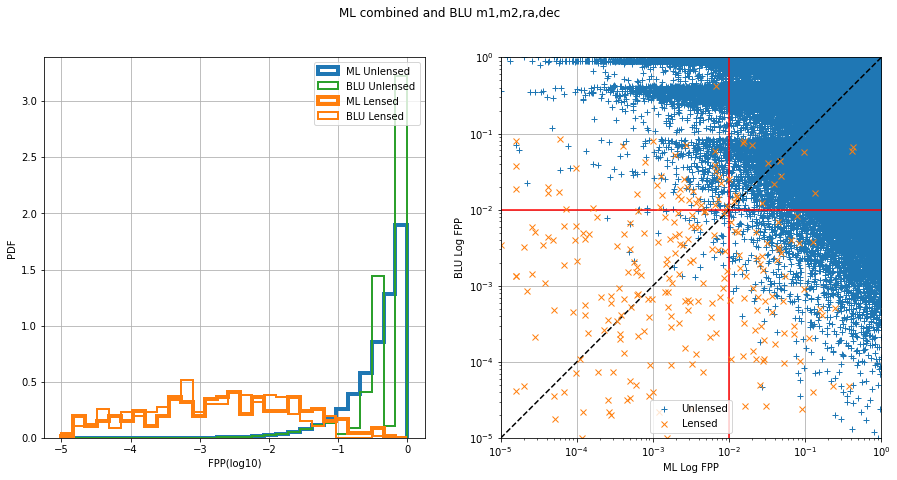

In [8]:
ml_stat='densnet_xgbsky_bayestar_mul_0'
blu_stat= 'm1, m2, ra, sin_dec'
plt.figure(figsize=(15,7))
plt.subplot(121)
bins=np.linspace(-5,0,30)
#plt.ylim(-100,1e3)
df=df_test[df_test['Lensing'] == 0]
plt.hist(np.log10(df[ml_stat+'_fpp']),bins=bins,label='ML Unlensed', histtype='step',density=True,color='C0',lw=4)
plt.hist(np.log10(df[blu_stat+'_fpp']),bins=bins,label='BLU Unlensed', histtype='step',density=True,color='C2',lw=2)

df=df_test[df_test['Lensing'] == 1]
plt.hist(np.log10(df[ml_stat+'_fpp']),bins=bins,label='ML Lensed', histtype='step',density=True,color='C1',lw=4)
plt.hist(np.log10(df[blu_stat+'_fpp']),bins=bins,label='BLU Lensed', histtype='step',density=True,color='C1',lw=2)

plt.legend()
plt.xlabel('FPP(log10)')
plt.ylabel('PDF')
plt.grid()

plt.subplot(122)
df=df_test[df_test['Lensing'] == 0]
plt.loglog(df[ml_stat+'_fpp'],df[blu_stat+'_fpp'],'+',label='Unlensed',color='C0')
plt.axvline(1e-2,color='r')
plt.axhline(1e-2,color='r')

plt.loglog(10**bins,10**bins,'k--')
df=df_test[df_test['Lensing'] == 1]
plt.loglog(df[ml_stat+'_fpp'],df[blu_stat+'_fpp'],'x',label='Lensed',color='C1')
plt.legend()
plt.xlabel('ML Log FPP')
plt.ylabel('BLU Log FPP')
plt.xlim(1e-5,1)
plt.ylim(1e-5,1)
plt.grid()
plt.suptitle('ML combined and BLU m1,m2,ra,dec')

plt.show()

## Elimiation and identification by BLU and ML

In [9]:
df=df_test[df_test['Lensing'] == 0]
common_ul_frac=len(df[(df[ml_stat+'_fpp']>1e-2) & (df[blu_stat+'_fpp']>1e-2)])/len(df)
print(' common unlensed fraction i.e. weed out by ML & BLU: %.3f'%common_ul_frac)

df=df_test[df_test['Lensing'] == 1]
common_l_frac_sel=len(df[(df[ml_stat+'_fpp']<1e-2) & (df[blu_stat+'_fpp']<1e-2)])/len(df)
print(' common lensed fraction i.e. identified by ML & BLU: %.3f'%common_l_frac_sel)

df=df_test[df_test['Lensing'] == 1]
common_l_frac=len(df[(df[ml_stat+'_fpp']>1e-2) & (df[blu_stat+'_fpp']>1e-2)])/len(df)
print(' common lensed fraction i.e. weed out by ML & BLU: %.3f'%common_l_frac)

df=df_test[df_test['Lensing'] == 1]
common_l_frac=len(df[(df[ml_stat+'_fpp']<1e-2) & (df[blu_stat+'_fpp']>1e-2)])/len(df)
print(' lensed fraction i.e. weed out by BLU but identified by ML: %.3f'%common_l_frac)

df=df_test[df_test['Lensing'] == 1]
common_l_frac=len(df[(df[ml_stat+'_fpp']>1e-2) & (df[blu_stat+'_fpp']<1e-2)])/len(df)
print(' lensed fraction i.e. weed out by ML but identified by BLU: %.3f'%common_l_frac)

 common unlensed fraction i.e. weed out by ML & BLU: 0.980
 common lensed fraction i.e. identified by ML & BLU: 0.572
 common lensed fraction i.e. weed out by ML & BLU: 0.055
 lensed fraction i.e. weed out by BLU but identified by ML: 0.147
 lensed fraction i.e. weed out by ML but identified by BLU: 0.226


## Investigating high FPP lensed events as classified by ML and BLU

In [10]:
df_lensed=df_test[df_test['Lensing'] == 1]


In [11]:
tags=df_lensed['img_0'].str.rsplit('_',1).values


In [12]:
ids=[]
event_tags=[]
for event in tags:
    event_tag=event[0]
    idx=np.where(event_tag==lensed_data_haris['event_tag'])[0][0]
    ids.append(idx),event_tags.append(event_tag)
df_lensed['inj_id']=ids
df_lensed['event_tag'] = event_tags
df_lensed.tail()

/home1/srashti.goyal/anaconda3/envs/bilby_env/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/home1/srashti.goyal/anaconda3/envs/bilby_env/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,img_0,img_1,Lensing,bayestar_skymaps_blu,bayestar_skymaps_d2,bayestar_skymaps_d3,bayestar_skymaps_lsq,"m1, m2, ra, sin_dec, a1, a2, costilt1, costilt2, costheta_jn","m1, m2, ra, sin_dec, costheta_jn","ra, sin_dec",...,densnet_xgbsky_bayestar_mul_5,densnet_xgbsky_bayestar_mul_6,densnet_xgbsky_bayestar_mul_7,densnet_xgbsky_bayestar_mul_8,densnet_xgbsky_bayestar_mul_9,densnet_xgbsky_bayestar_mul_10,densnet_xgbsky_bayestar_mul_0_fpp,"m1, m2, ra, sin_dec_fpp",inj_id,event_tag
488687,6_776_922792012.262599229-1,6_776_922776093.028576493-2,1,1.463252,0.011798,0.169570,0.210909,2.224779,6.997735,0.321742,...,7.326459e-08,2.565130e-07,7.027256e-08,7.022883e-08,1.483409e-07,2.168404e-08,0.408404,0.059712,42,6_776
491785,1_3705_799513513.058334946-1,1_3705_799513179.459235787-2,1,1.136169,0.009161,0.071357,0.102656,674.765375,1329.098388,9.622317,...,1.252604e-04,1.446614e-04,1.683169e-04,1.596341e-04,1.228052e-04,2.454900e-04,0.013626,0.002549,5,1_3705
493900,4_2927_925062023.766241908-1,4_2927_925061580.558222651-2,1,49.288039,0.397404,7.908766,0.103262,55052.012344,68790.270845,575.512712,...,8.481221e-02,8.710976e-02,6.889510e-02,7.093507e-02,6.841390e-02,1.026751e-01,0.000068,0.000040,253,4_2927
494225,7_14252_840356197.120135545-1,7_14252_840356196.097228527-2,1,47.956584,0.386668,10.588196,0.118123,301114.258237,167512.998738,281.475333,...,1.986768e-02,4.001265e-02,2.978803e-02,2.467714e-02,2.892454e-02,5.345440e-02,0.000126,0.000008,66,7_14252
494383,4_85_831706154.318115353-1,4_85_831670545.782117366-2,1,24.699994,0.199153,6.638030,0.090036,27412.931462,27183.774790,50.924077,...,6.359293e-07,5.766389e-07,5.191740e-07,8.359793e-08,5.333945e-07,5.614538e-07,0.232509,0.000048,118,4_85


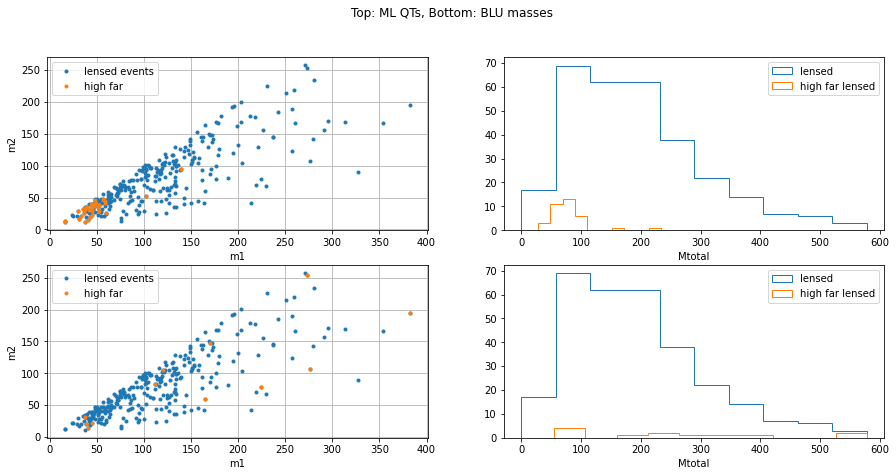

In [13]:
plt.figure(figsize=(15,7))
ml_stat='xgb_dense_QTS_0'
df_lensed_high_far=df_lensed[df_lensed[ml_stat+'_fpp']>2e-1].reset_index()
mtotal_high_fars=lensed_data_haris['m1'][df_lensed_high_far['inj_id']]+lensed_data_haris['m2'][df_lensed_high_far['inj_id']]

plt.subplot(221)
plt.plot(lensed_data_haris['m1'][df_lensed['inj_id']],lensed_data_haris['m2'][df_lensed['inj_id']],'.',label='lensed events')
plt.plot(lensed_data_haris['m1'][df_lensed_high_far['inj_id']],lensed_data_haris['m2'][df_lensed_high_far['inj_id']],'.',label='high far')
plt.xlabel('m1')
plt.ylabel('m2')
plt.legend()
plt.grid()
plt.subplot(222)
plt.hist(lensed_data_haris['m1']+lensed_data_haris['m2'],density=False,histtype='step',label='lensed')
plt.hist(mtotal_high_fars,density=False,histtype='step',label='high far lensed')
plt.xlabel('Mtotal')
plt.legend()

blu_stat='m1, m2'
df_lensed_high_far=df_lensed[df_lensed[blu_stat+'_fpp']>2e-1].reset_index()
mtotal_high_fars=lensed_data_haris['m1'][df_lensed_high_far['inj_id']]+lensed_data_haris['m2'][df_lensed_high_far['inj_id']]

plt.subplot(223)
plt.plot(lensed_data_haris['m1'][df_lensed['inj_id']],lensed_data_haris['m2'][df_lensed['inj_id']],'.',label='lensed events')
plt.plot(lensed_data_haris['m1'][df_lensed_high_far['inj_id']],lensed_data_haris['m2'][df_lensed_high_far['inj_id']],'.',label='high far')
plt.xlabel('m1')
plt.ylabel('m2')
plt.legend()
plt.grid()
plt.subplot(224)
plt.hist(lensed_data_haris['m1']+lensed_data_haris['m2'],density=False,histtype='step',label='lensed')
plt.hist(mtotal_high_fars,density=False,histtype='step',label='high far lensed')
plt.xlabel('Mtotal')
plt.legend()
plt.suptitle('Top: ML QTs, Bottom: BLU masses')
plt.show()

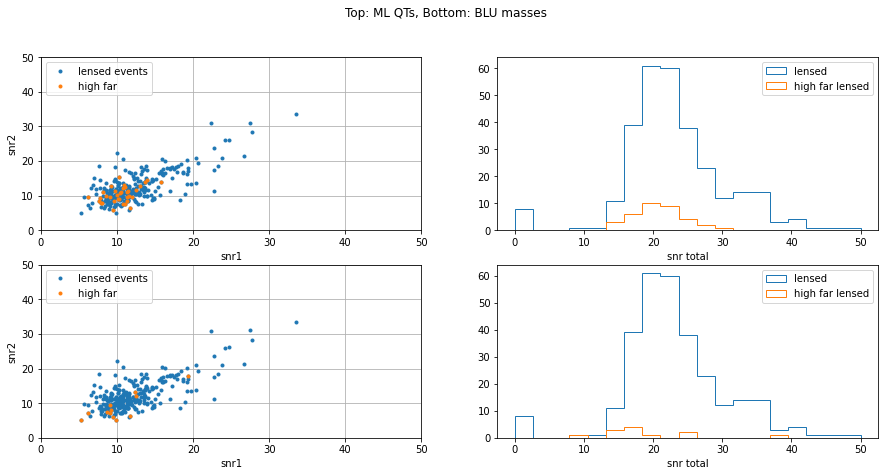

In [14]:
plt.figure(figsize=(15,7))
ml_stat='xgb_dense_QTS_0'
df_lensed_high_far=df_lensed[df_lensed[ml_stat+'_fpp']>2e-1].reset_index()
snrtotal_high_fars=lensed_data_haris['snr'][df_lensed_high_far['inj_id']][:,0]+lensed_data_haris['snr'][df_lensed_high_far['inj_id']][:,1]
bins=np.linspace(0,50,20)
plt.subplot(221)
plt.plot(lensed_data_haris['snr'][df_lensed['inj_id']][:,0],lensed_data_haris['snr'][df_lensed['inj_id']][:,1],'.',label='lensed events')
plt.plot(lensed_data_haris['snr'][df_lensed_high_far['inj_id']][:,0],lensed_data_haris['snr'][df_lensed_high_far['inj_id']][:,1],'.',label='high far')
plt.xlabel('snr1')
plt.ylabel('snr2')
plt.legend()
plt.grid()
plt.xlim(0,50)
plt.ylim(0,50)
plt.subplot(222)
plt.hist(lensed_data_haris['snr'][:,0]+lensed_data_haris['snr'][:,1],bins=bins,density=False,histtype='step',label='lensed')
plt.hist(snrtotal_high_fars,bins=bins,density=False,histtype='step',label='high far lensed')
plt.xlabel('snr total')
plt.legend()

blu_stat='m1, m2'
df_lensed_high_far=df_lensed[df_lensed[blu_stat+'_fpp']>2e-1].reset_index()
snrtotal_high_fars=lensed_data_haris['snr'][df_lensed_high_far['inj_id']][:,0]+lensed_data_haris['snr'][df_lensed_high_far['inj_id']][:,1]

plt.subplot(223)
plt.plot(lensed_data_haris['snr'][df_lensed['inj_id']][:,0],lensed_data_haris['snr'][df_lensed['inj_id']][:,1],'.',label='lensed events')
plt.plot(lensed_data_haris['snr'][df_lensed_high_far['inj_id']][:,0],lensed_data_haris['snr'][df_lensed_high_far['inj_id']][:,1],'.',label='high far')
plt.xlabel('snr1')
plt.ylabel('snr2')
plt.xlim(0,50)
plt.ylim(0,50)
plt.legend()
plt.grid()
plt.subplot(224)
plt.hist(lensed_data_haris['snr'][:,0]+lensed_data_haris['snr'][:,1],bins=bins,density=False,histtype='step',label='lensed')
plt.hist(snrtotal_high_fars,bins=bins,density=False,histtype='step',label='high far lensed')
plt.xlabel('snr total')
plt.legend()
plt.suptitle('Top: ML QTs, Bottom: BLU masses')
plt.show()

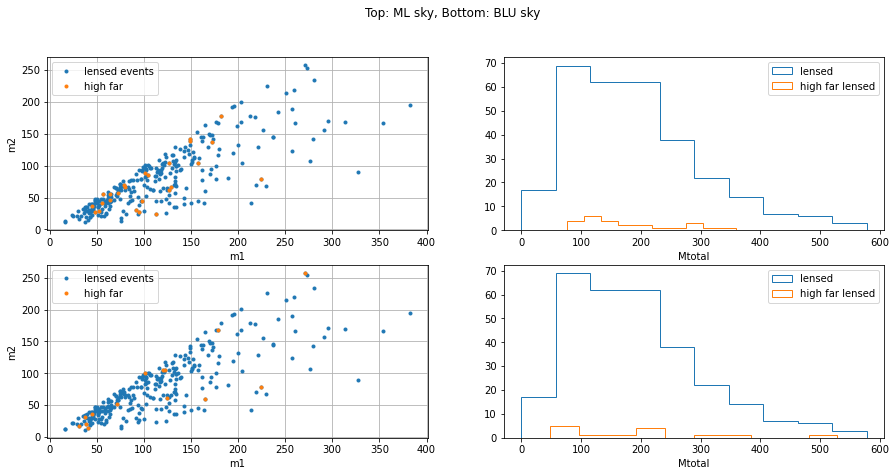

In [15]:
plt.figure(figsize=(15,7))
ml_stat='xgb_pred_bayestar_skymaps'
blu_stat= 'ra, sin_dec'

df_lensed_high_far=df_lensed[df_lensed[ml_stat+'_fpp']>1e-1].reset_index()
mtotal_high_fars=lensed_data_haris['m1'][df_lensed_high_far['inj_id']]+lensed_data_haris['m2'][df_lensed_high_far['inj_id']]

plt.subplot(221)
plt.plot(lensed_data_haris['m1'][df_lensed['inj_id']],lensed_data_haris['m2'][df_lensed['inj_id']],'.',label='lensed events')
plt.plot(lensed_data_haris['m1'][df_lensed_high_far['inj_id']],lensed_data_haris['m2'][df_lensed_high_far['inj_id']],'.',label='high far')
plt.xlabel('m1')
plt.ylabel('m2')
plt.legend()
plt.grid()
plt.subplot(222)
plt.hist(lensed_data_haris['m1']+lensed_data_haris['m2'],density=False,histtype='step',label='lensed')
plt.hist(mtotal_high_fars,density=False,histtype='step',label='high far lensed')
plt.xlabel('Mtotal')
plt.legend()

df_lensed_high_far=df_lensed[df_lensed[blu_stat+'_fpp']>1e-1].reset_index()
mtotal_high_fars=lensed_data_haris['m1'][df_lensed_high_far['inj_id']]+lensed_data_haris['m2'][df_lensed_high_far['inj_id']]

plt.subplot(223)
plt.plot(lensed_data_haris['m1'][df_lensed['inj_id']],lensed_data_haris['m2'][df_lensed['inj_id']],'.',label='lensed events')
plt.plot(lensed_data_haris['m1'][df_lensed_high_far['inj_id']],lensed_data_haris['m2'][df_lensed_high_far['inj_id']],'.',label='high far')
plt.xlabel('m1')
plt.ylabel('m2')
plt.legend()
plt.grid()
plt.subplot(224)
plt.hist(lensed_data_haris['m1']+lensed_data_haris['m2'],density=False,histtype='step',label='lensed')
plt.hist(mtotal_high_fars,density=False,histtype='step',label='high far lensed')
plt.xlabel('Mtotal')
plt.legend()
plt.suptitle('Top: ML sky, Bottom: BLU sky')
plt.show()

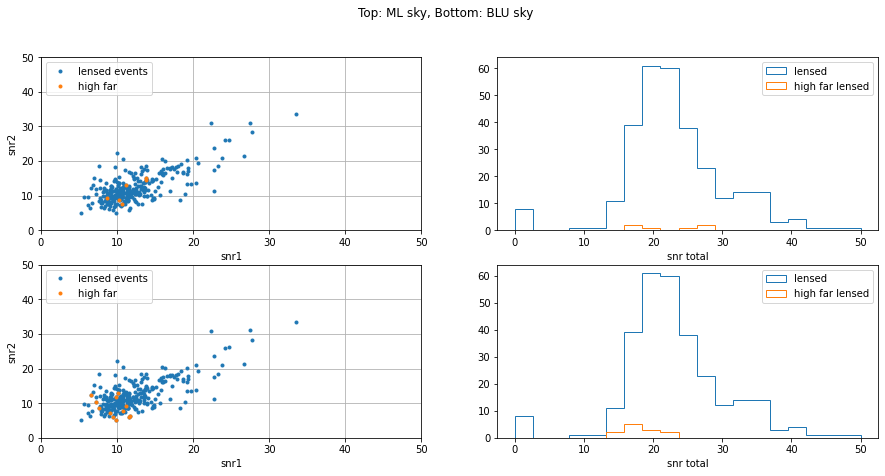

In [16]:
plt.figure(figsize=(15,7))
ml_stat='xgb_pred_bayestar_skymaps'
blu_stat= 'ra, sin_dec'

df_lensed_high_far=df_lensed[df_lensed[ml_stat+'_fpp']>2e-1].reset_index()
snrtotal_high_fars=lensed_data_haris['snr'][df_lensed_high_far['inj_id']][:,0]+lensed_data_haris['snr'][df_lensed_high_far['inj_id']][:,1]
bins=np.linspace(0,50,20)
plt.subplot(221)
plt.plot(lensed_data_haris['snr'][df_lensed['inj_id']][:,0],lensed_data_haris['snr'][df_lensed['inj_id']][:,1],'.',label='lensed events')
plt.plot(lensed_data_haris['snr'][df_lensed_high_far['inj_id']][:,0],lensed_data_haris['snr'][df_lensed_high_far['inj_id']][:,1],'.',label='high far')
plt.xlabel('snr1')
plt.ylabel('snr2')
plt.legend()
plt.grid()
plt.xlim(0,50)
plt.ylim(0,50)
plt.subplot(222)
plt.hist(lensed_data_haris['snr'][:,0]+lensed_data_haris['snr'][:,1],bins=bins,histtype='step',label='lensed')
plt.hist(snrtotal_high_fars,bins=bins,histtype='step',label='high far lensed')
plt.xlabel('snr total')
plt.legend()

df_lensed_high_far=df_lensed[df_lensed[blu_stat+'_fpp']>2e-1].reset_index()
snrtotal_high_fars=lensed_data_haris['snr'][df_lensed_high_far['inj_id']][:,0]+lensed_data_haris['snr'][df_lensed_high_far['inj_id']][:,1]

plt.subplot(223)
plt.plot(lensed_data_haris['snr'][df_lensed['inj_id']][:,0],lensed_data_haris['snr'][df_lensed['inj_id']][:,1],'.',label='lensed events')
plt.plot(lensed_data_haris['snr'][df_lensed_high_far['inj_id']][:,0],lensed_data_haris['snr'][df_lensed_high_far['inj_id']][:,1],'.',label='high far')
plt.xlabel('snr1')
plt.ylabel('snr2')
plt.xlim(0,50)
plt.ylim(0,50)
plt.legend()
plt.grid()
plt.subplot(224)
plt.hist(lensed_data_haris['snr'][:,0]+lensed_data_haris['snr'][:,1],bins=bins,histtype='step',label='lensed')
plt.hist(snrtotal_high_fars,bins=bins,histtype='step',label='high far lensed')
plt.xlabel('snr total')
plt.legend()
plt.suptitle('Top: ML sky, Bottom: BLU sky')
plt.show()

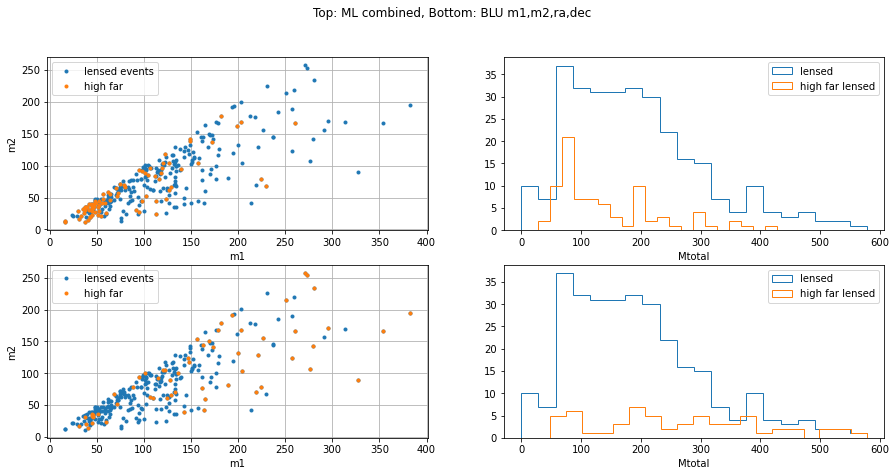

In [17]:
ml_stat='densnet_xgbsky_bayestar_mul_0'
blu_stat= 'm1, m2, ra, sin_dec'

plt.figure(figsize=(15,7))
df_lensed_high_far=df_lensed[df_lensed[ml_stat+'_fpp']>1e-2].reset_index()
mtotal_high_fars=lensed_data_haris['m1'][df_lensed_high_far['inj_id']]+lensed_data_haris['m2'][df_lensed_high_far['inj_id']]
bs=20
plt.subplot(221)
plt.plot(lensed_data_haris['m1'][df_lensed['inj_id']],lensed_data_haris['m2'][df_lensed['inj_id']],'.',label='lensed events')
plt.plot(lensed_data_haris['m1'][df_lensed_high_far['inj_id']],lensed_data_haris['m2'][df_lensed_high_far['inj_id']],'.',label='high far')
plt.xlabel('m1')
plt.ylabel('m2')
plt.legend()
plt.grid()
plt.subplot(222)
plt.hist(lensed_data_haris['m1']+lensed_data_haris['m2'],bs,density=False,histtype='step',label='lensed')
plt.hist(mtotal_high_fars,bs,density=False,histtype='step',label='high far lensed')
plt.xlabel('Mtotal')
plt.legend()

df_lensed_high_far=df_lensed[df_lensed[blu_stat+'_fpp']>1e-2].reset_index()
mtotal_high_fars=lensed_data_haris['m1'][df_lensed_high_far['inj_id']]+lensed_data_haris['m2'][df_lensed_high_far['inj_id']]

plt.subplot(223)
plt.plot(lensed_data_haris['m1'][df_lensed['inj_id']],lensed_data_haris['m2'][df_lensed['inj_id']],'.',label='lensed events')
plt.plot(lensed_data_haris['m1'][df_lensed_high_far['inj_id']],lensed_data_haris['m2'][df_lensed_high_far['inj_id']],'.',label='high far')
plt.xlabel('m1')
plt.ylabel('m2')
plt.legend()
plt.grid()
plt.subplot(224)
plt.hist(lensed_data_haris['m1']+lensed_data_haris['m2'],bs,density=False,histtype='step',label='lensed')
plt.hist(mtotal_high_fars,bs,density=False,histtype='step',label='high far lensed')
plt.xlabel('Mtotal')
plt.legend()
plt.suptitle('Top: ML combined, Bottom: BLU m1,m2,ra,dec')
plt.show()

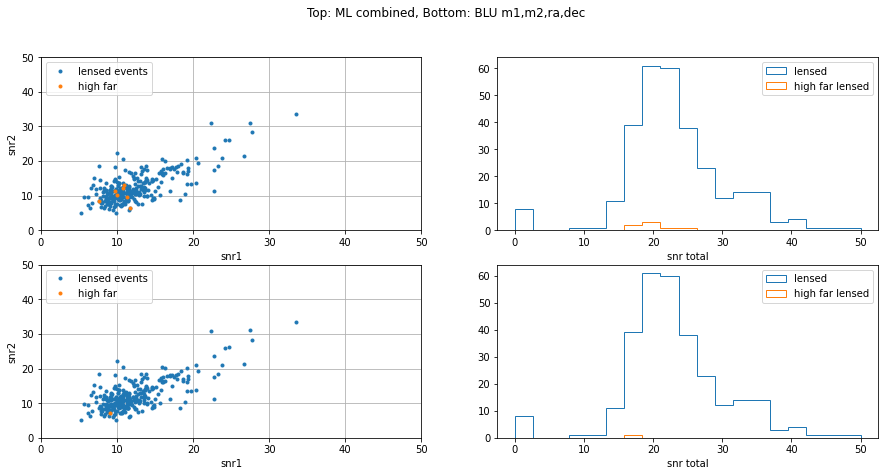

In [18]:
plt.figure(figsize=(15,7))
ml_stat='densnet_xgbsky_bayestar_mul_0'
blu_stat= 'm1, m2, ra, sin_dec'


df_lensed_high_far=df_lensed[df_lensed[ml_stat+'_fpp']>2e-1].reset_index()
snrtotal_high_fars=lensed_data_haris['snr'][df_lensed_high_far['inj_id']][:,0]+lensed_data_haris['snr'][df_lensed_high_far['inj_id']][:,1]
bins=np.linspace(0,50,20)
plt.subplot(221)
plt.plot(lensed_data_haris['snr'][df_lensed['inj_id']][:,0],lensed_data_haris['snr'][df_lensed['inj_id']][:,1],'.',label='lensed events')
plt.plot(lensed_data_haris['snr'][df_lensed_high_far['inj_id']][:,0],lensed_data_haris['snr'][df_lensed_high_far['inj_id']][:,1],'.',label='high far')
plt.xlabel('snr1')
plt.ylabel('snr2')
plt.legend()
plt.grid()
plt.xlim(0,50)
plt.ylim(0,50)
plt.subplot(222)
plt.hist(lensed_data_haris['snr'][:,0]+lensed_data_haris['snr'][:,1],bins=bins,histtype='step',label='lensed')
plt.hist(snrtotal_high_fars,bins=bins,histtype='step',label='high far lensed')
plt.xlabel('snr total')
plt.legend()

df_lensed_high_far=df_lensed[df_lensed[blu_stat+'_fpp']>2e-1].reset_index()
snrtotal_high_fars=lensed_data_haris['snr'][df_lensed_high_far['inj_id']][:,0]+lensed_data_haris['snr'][df_lensed_high_far['inj_id']][:,1]

plt.subplot(223)
plt.plot(lensed_data_haris['snr'][df_lensed['inj_id']][:,0],lensed_data_haris['snr'][df_lensed['inj_id']][:,1],'.',label='lensed events')
plt.plot(lensed_data_haris['snr'][df_lensed_high_far['inj_id']][:,0],lensed_data_haris['snr'][df_lensed_high_far['inj_id']][:,1],'.',label='high far')
plt.xlabel('snr1')
plt.ylabel('snr2')
plt.xlim(0,50)
plt.ylim(0,50)
plt.legend()
plt.grid()
plt.subplot(224)
plt.hist(lensed_data_haris['snr'][:,0]+lensed_data_haris['snr'][:,1],bins=bins,histtype='step',label='lensed')
plt.hist(snrtotal_high_fars,bins=bins,histtype='step',label='high far lensed')
plt.xlabel('snr total')
plt.legend()
plt.suptitle('Top: ML combined, Bottom: BLU m1,m2,ra,dec')
plt.show()

In [19]:
ml_stat='xgb_dense_QTS_0'
df_lensed_high_far=df_lensed[df_lensed[ml_stat+'_fpp']>2e-1].reset_index()
df_lensed_high_far['event_tag'].values

array(['4_489', '11_2586', '9_1317', '1_465', '7_1', '4_458', '6_42',
       '9_0', '8_529', '8_2956', '10_1887', '11_1242', '7_0', '8_62',
       '9_7347', '5_4766', '10_8779', '1_23', '8_2974', '6_1278',
       '5_1136', '4_270', '7_2286', '9_201', '9_317', '6_222', '10_599',
       '10_226', '1_493', '6_5368', '4_7346', '11_453', '4_1653', '6_776',
       '4_85'], dtype=object)

In [12]:
#https://www.kaggle.com/srashtigoyal/dnn-skymaps-sklearn-with-prob-distance-metrics